In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud
from konlpy.tag import Twitter
from wordcloud import STOPWORDS
from PIL import Image
from matplotlib import font_manager,rc

In [3]:
# 경찰청 사고 정보 데이터 불러오기
ac_data = pd.read_excel("2014 경찰청 사고 정보 데이터.xlsx")
ac_data.columns=['사고년월','법정동코드','HIT법정동코드','사고상황','사고유형코드']
ac_data = ac_data.drop(0)

In [4]:
# 법정동 코드 정보 불러오기
code1 = pd.read_excel("법정동코드.xls")
code1.columns=['법정동코드','법정동','1','2','3','4','5']
del code1["1"]
del code1["2"]
del code1["3"]
del code1["4"]
del code1["5"]

In [44]:
# 경찰청 사고 정보 데이터와 법정동 코드를 '법정동코드'로 합치기
result1 = pd.merge(ac_data, code1, on=['법정동코드'])

In [6]:
# 형태소 분석기 Twitter 사용
nlp = Twitter()

In [7]:
# 도 리스트 생성
m_list = ['서울특별시','강원도','경기도','경상남도','경상북도','광주광역시','대구광역시','대전광역시','부산광역시','세종특별자치시','울산광역시','인천광역시','전라남도','전라북도','제주특별자치도','충청남도','충청북도']

In [8]:
#stopwords 지정
stopwords = set(STOPWORDS)
stopwords.add("차로")
stopwords.add("방향")
stopwords.add("도로")
stopwords.add("사고")
stopwords.add("장소")
stopwords.add("부분")
stopwords.add("우측")
stopwords.add("좌측")
stopwords.add("편도")
stopwords.add("차량")
stopwords.add("방면")
stopwords.add("것임")
stopwords.add("범퍼")
stopwords.add("충격")
stopwords.add("교통사고")

In [9]:
# color function 설정
def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(50, 100)

In [10]:
# 폰트 설정
font_location = 'C:/Windows/Fonts/HMKMRHD.TTF'
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [47]:
for i in m_list:
    
    a = result1[result1['법정동'] == '%s' % i]
    b = a['사고상황']
    c = ",".join(str(v) for v in b)
    d = nlp.nouns(c)
    e = ",".join(d)
    wc2 = wc.generate(e)
    
    wc2

In [48]:
mask = np.array(Image.open("C:/python/프로젝트/마스크/대한민국.jpg"))
wc = WordCloud(background_color="black", max_words=2000, mask=mask, stopwords = stopwords,font_path = font_location)
fig = plt.figure()
title = ('대한민국')
fig.set_figwidth(14)
fig.set_figheight(18)


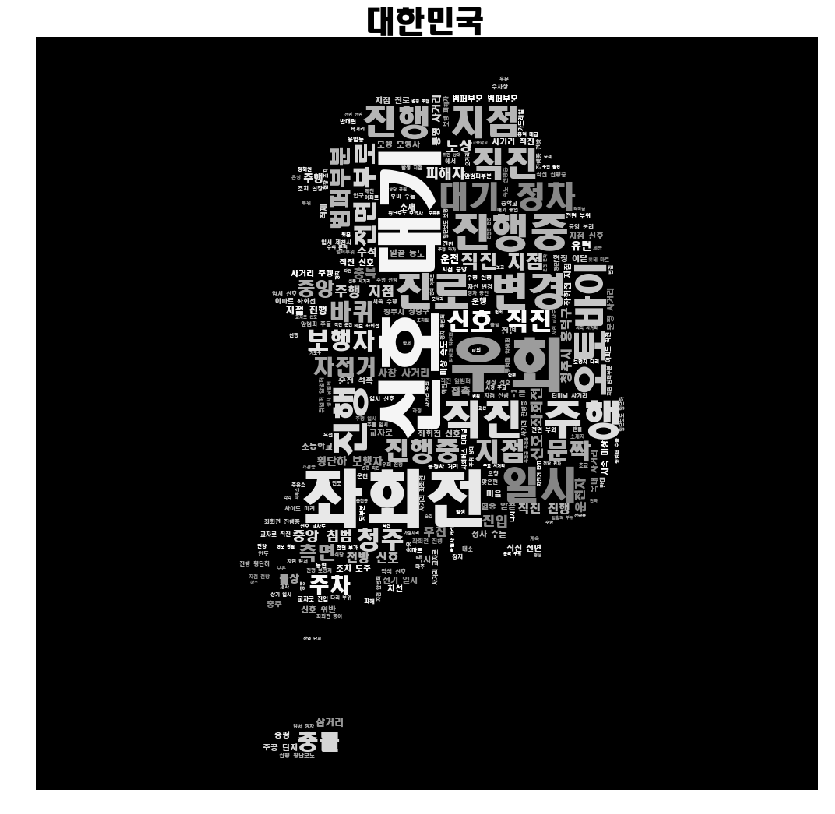

In [50]:
plt.imshow(wc2.recolor(color_func=grey_color, random_state=3))
plt.title(title, size=30)
plt.axis('off')
plt.show()

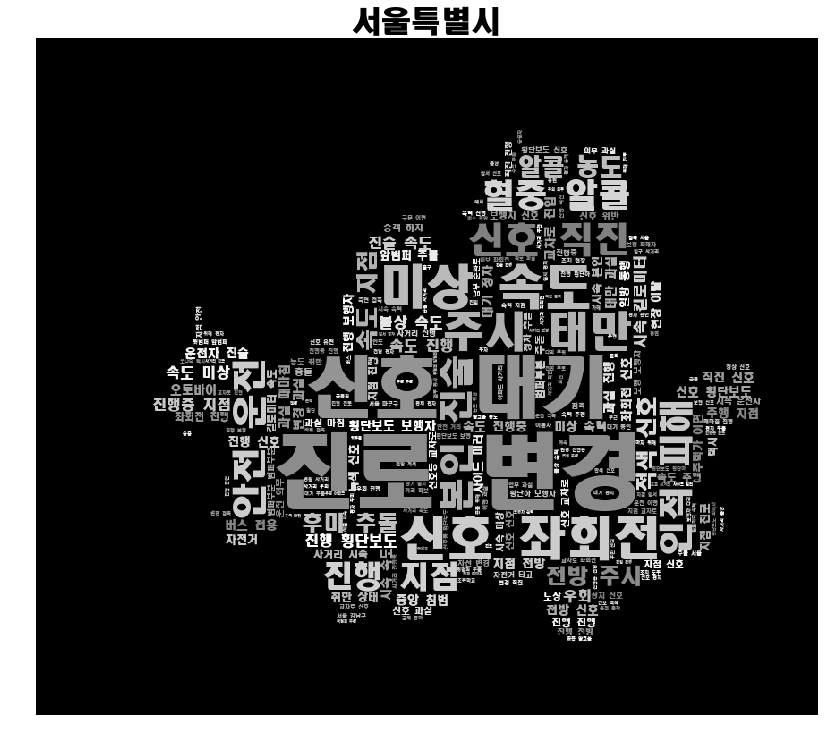

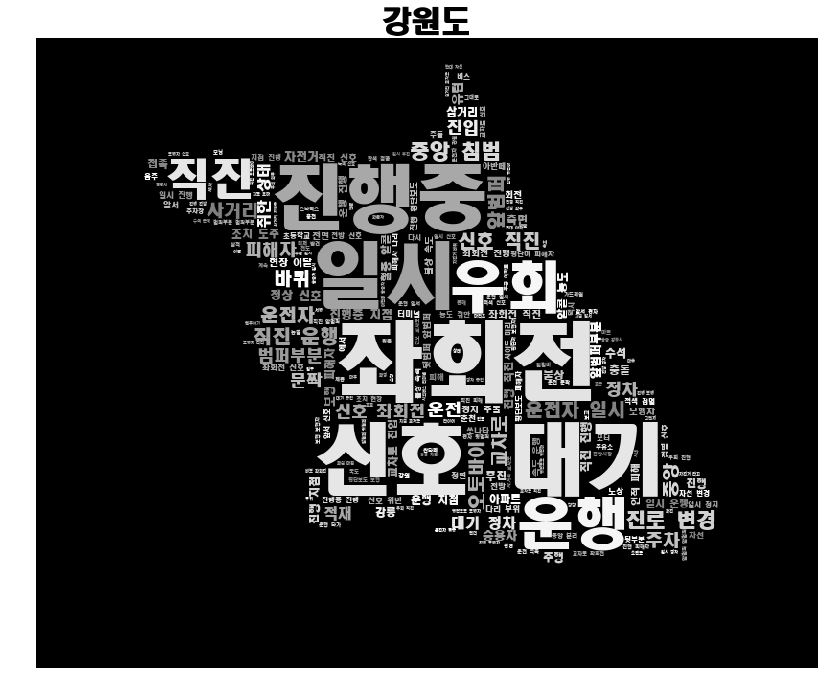

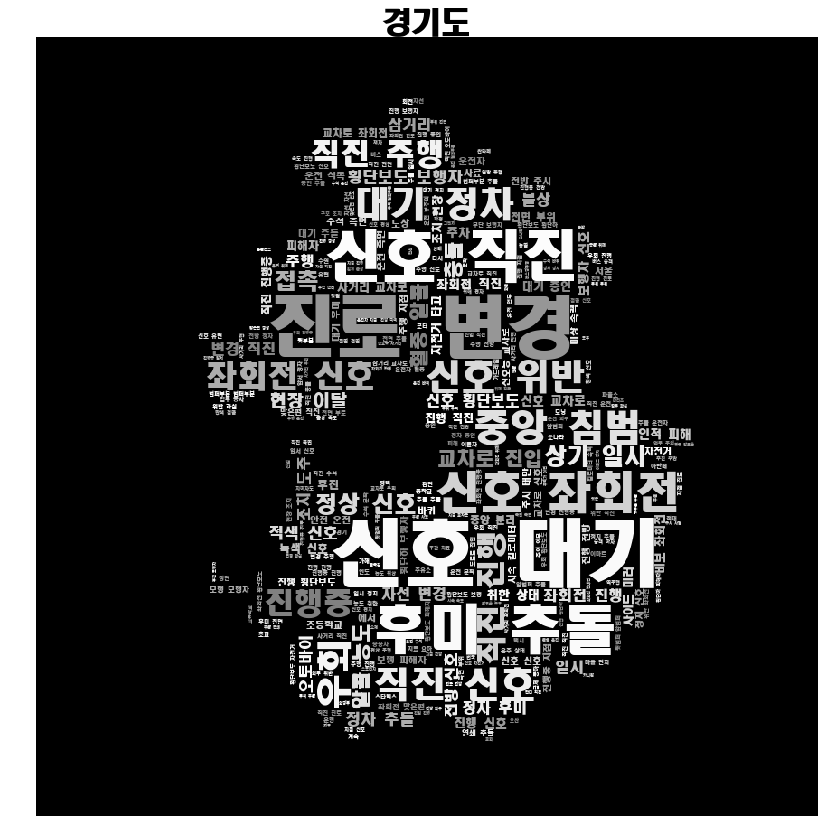

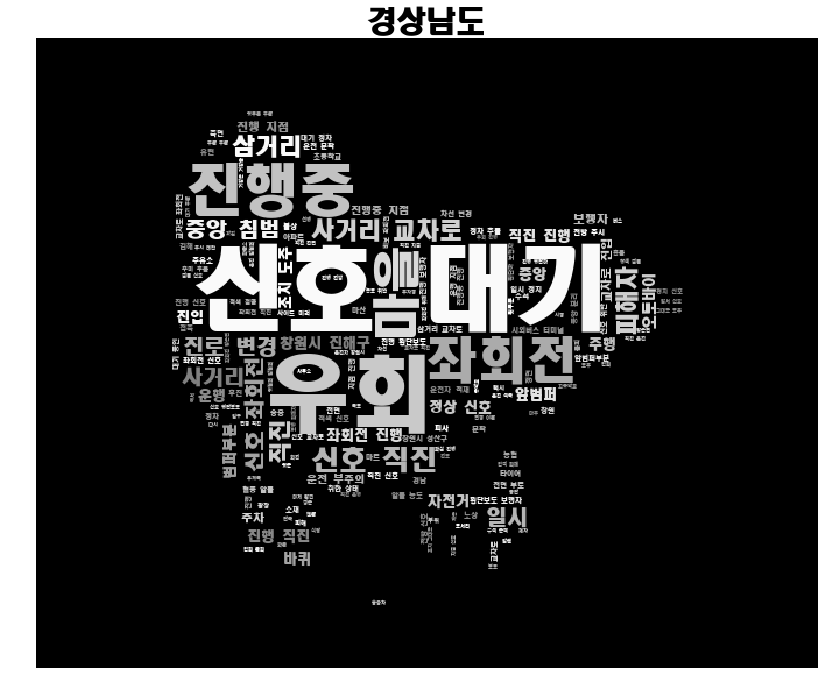

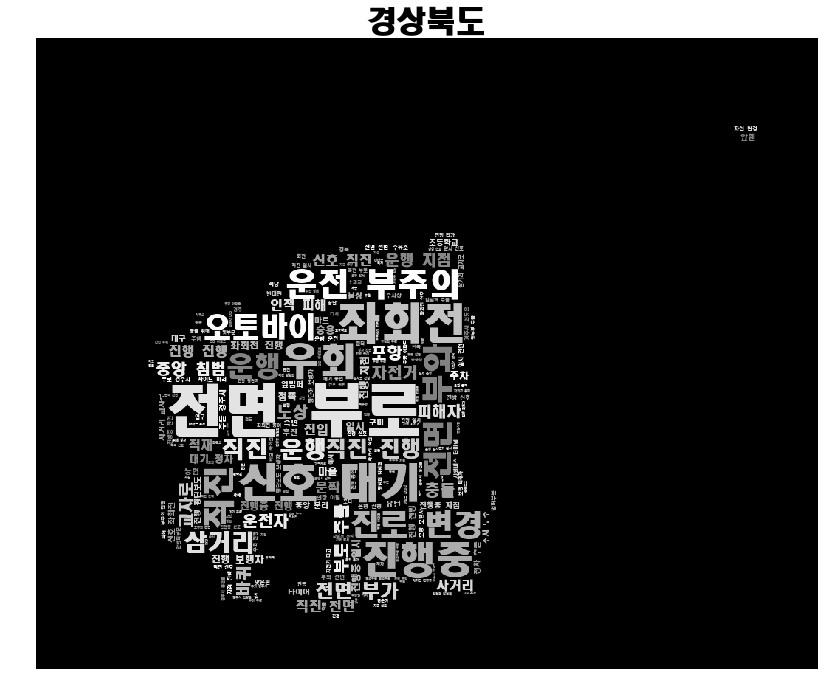

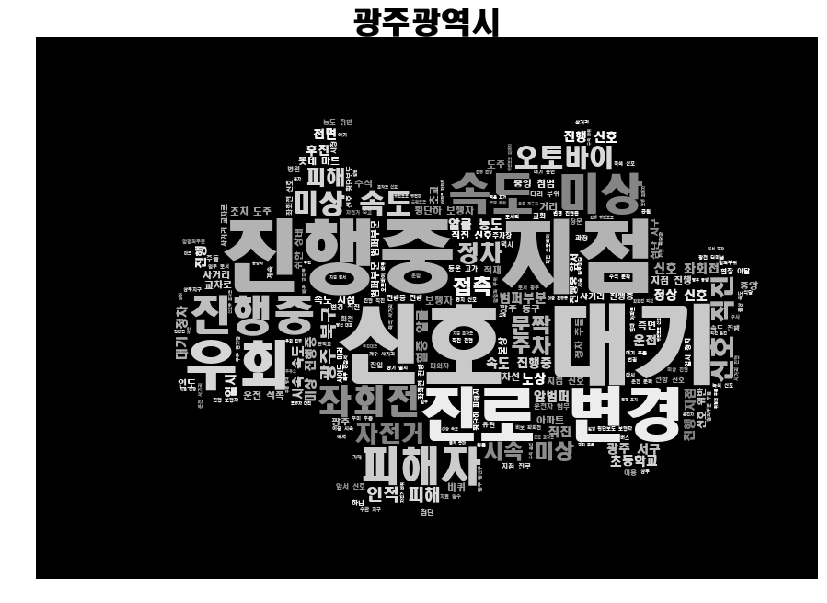

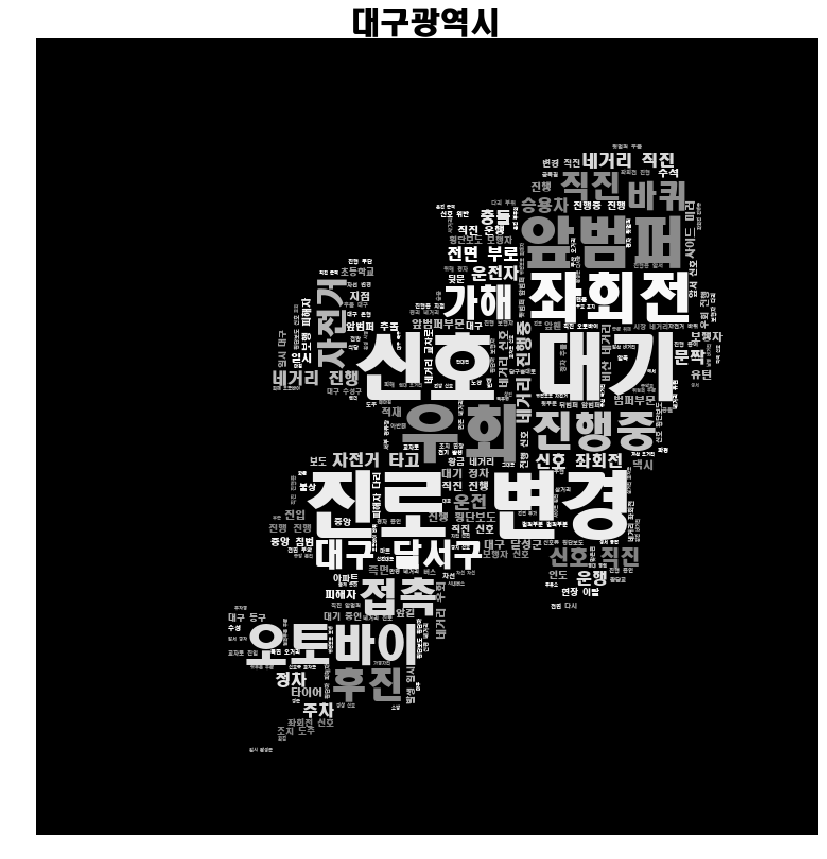

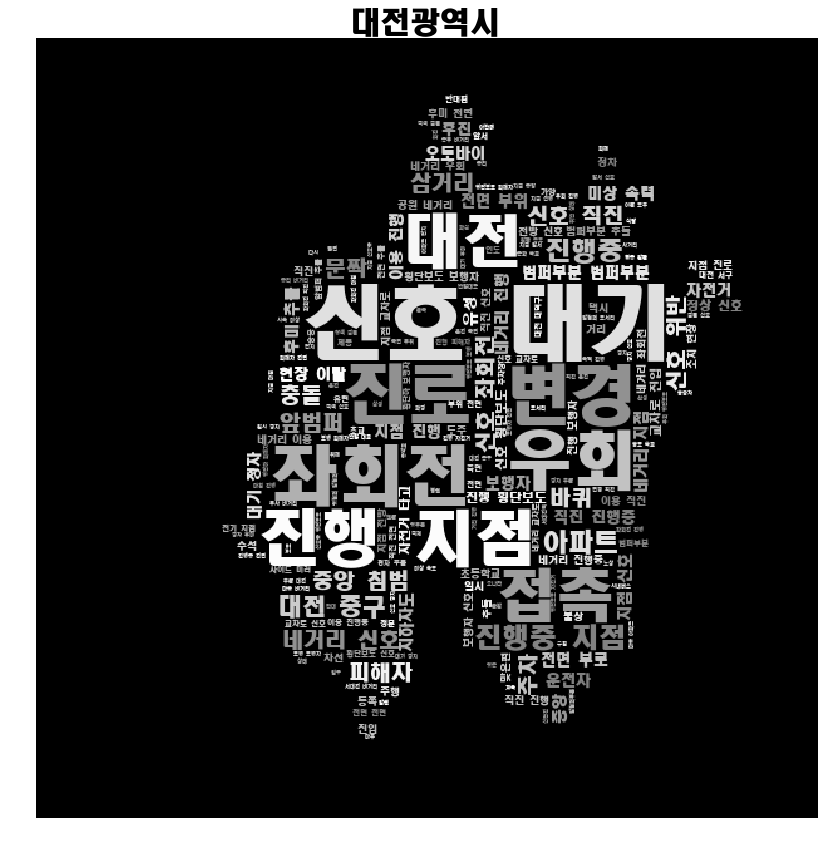

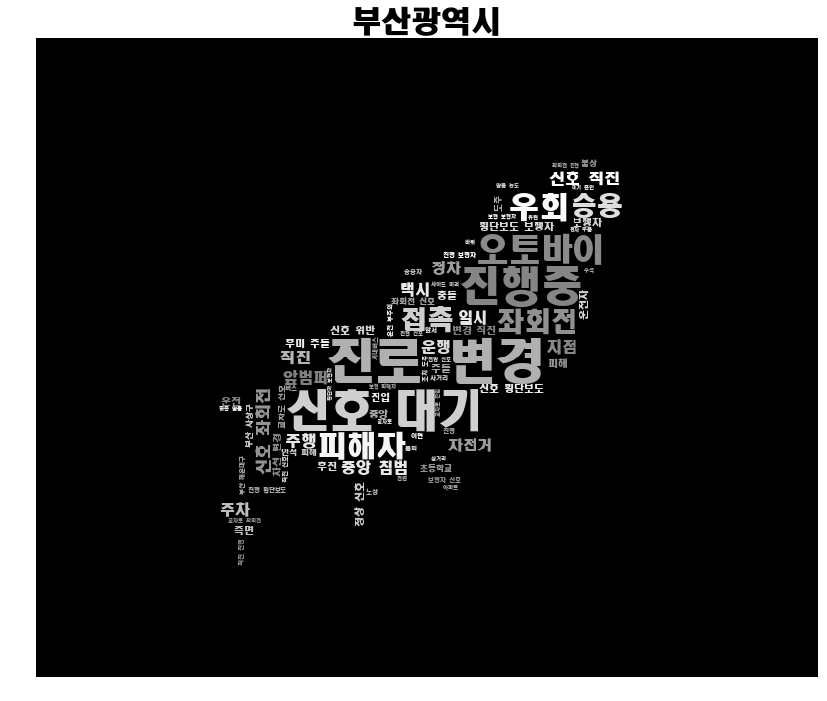

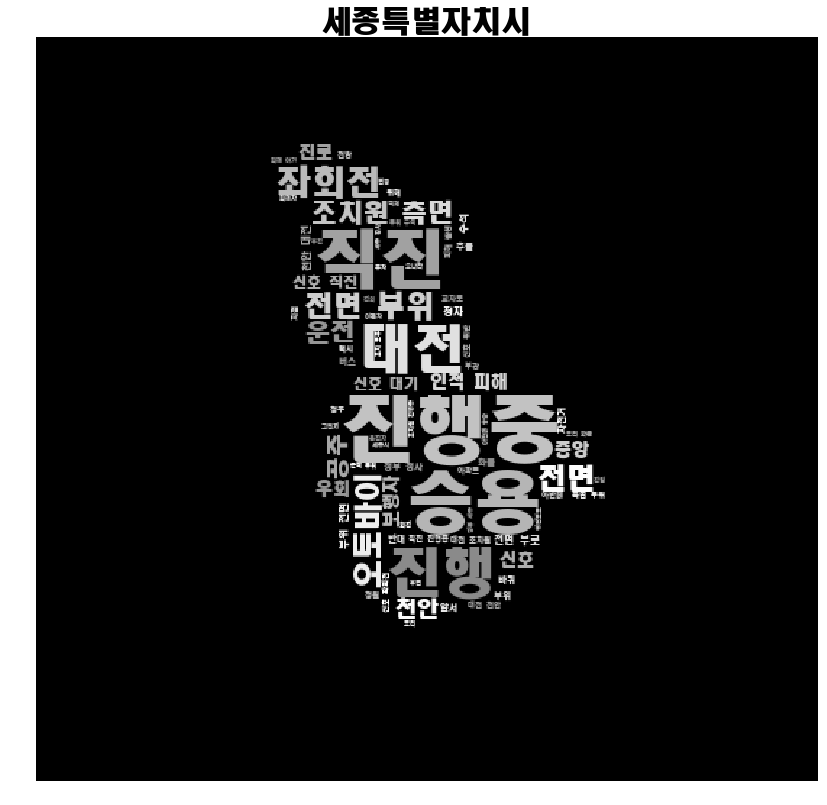

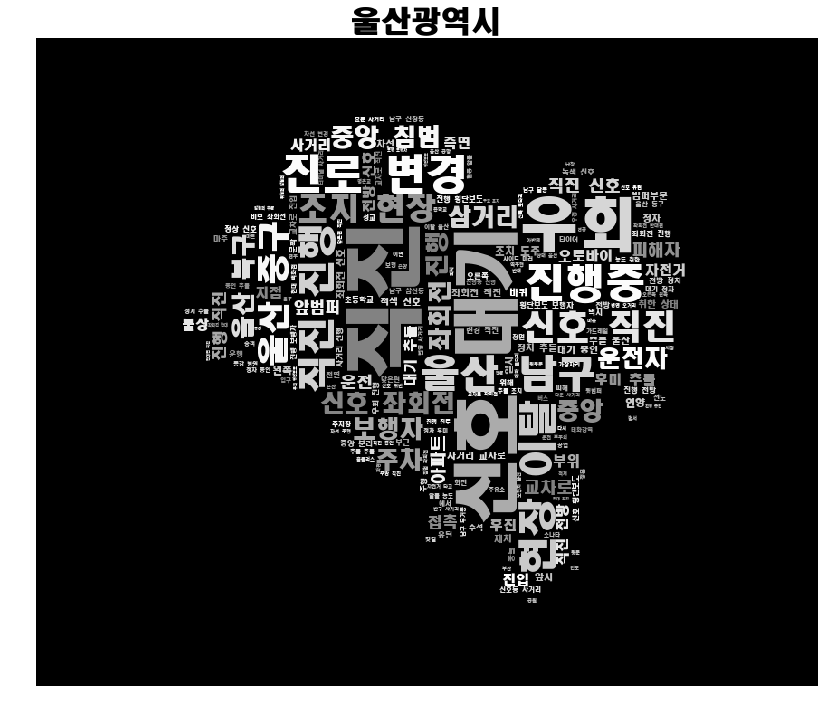

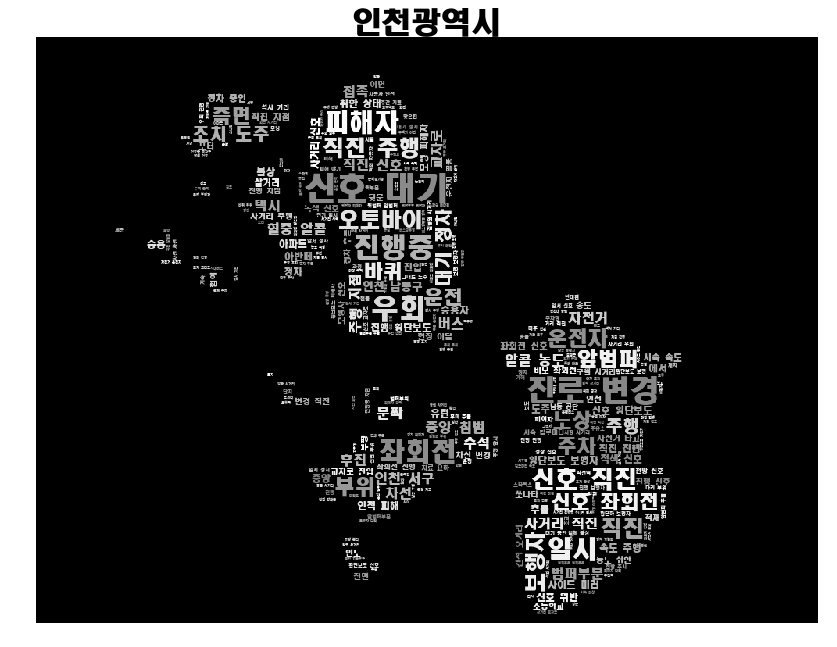

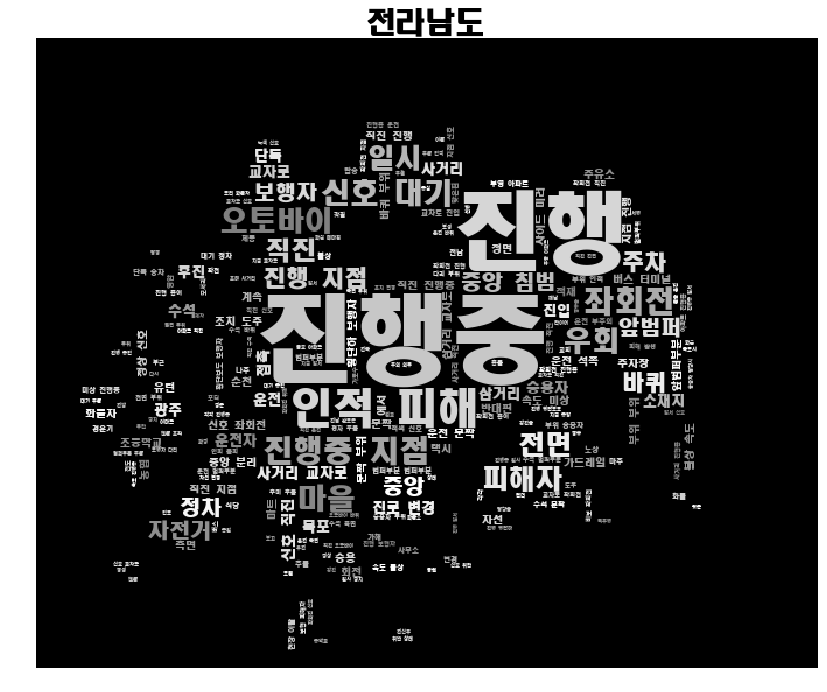

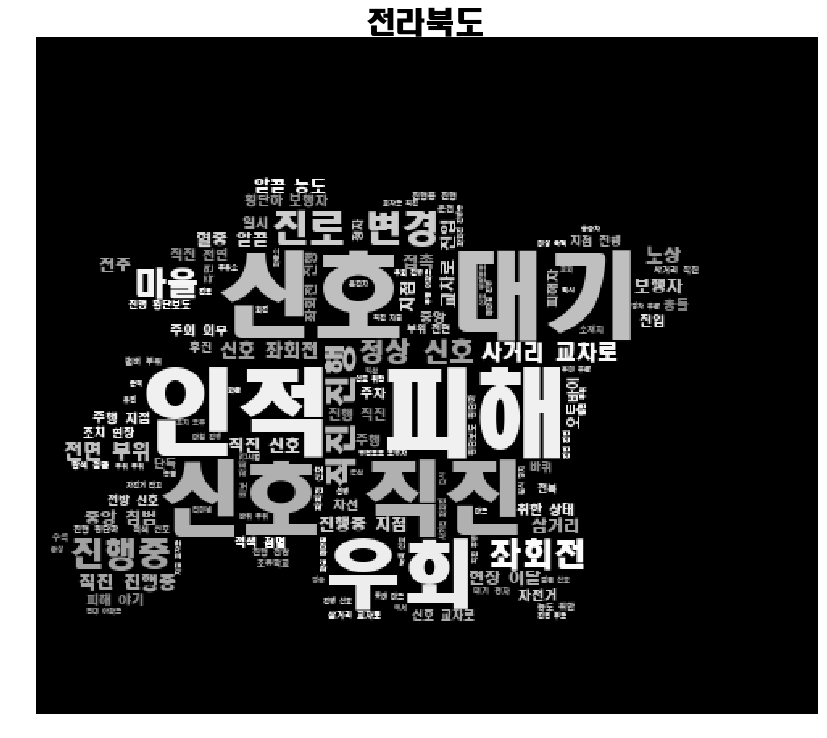

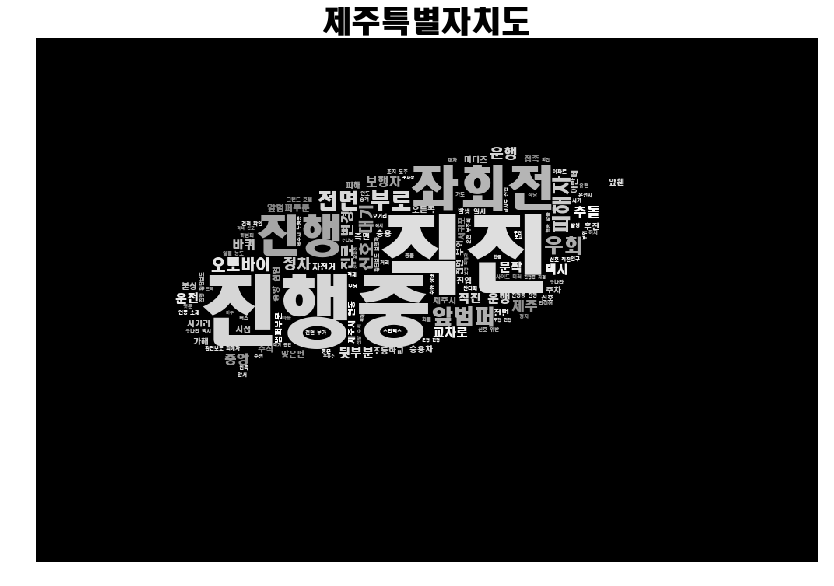

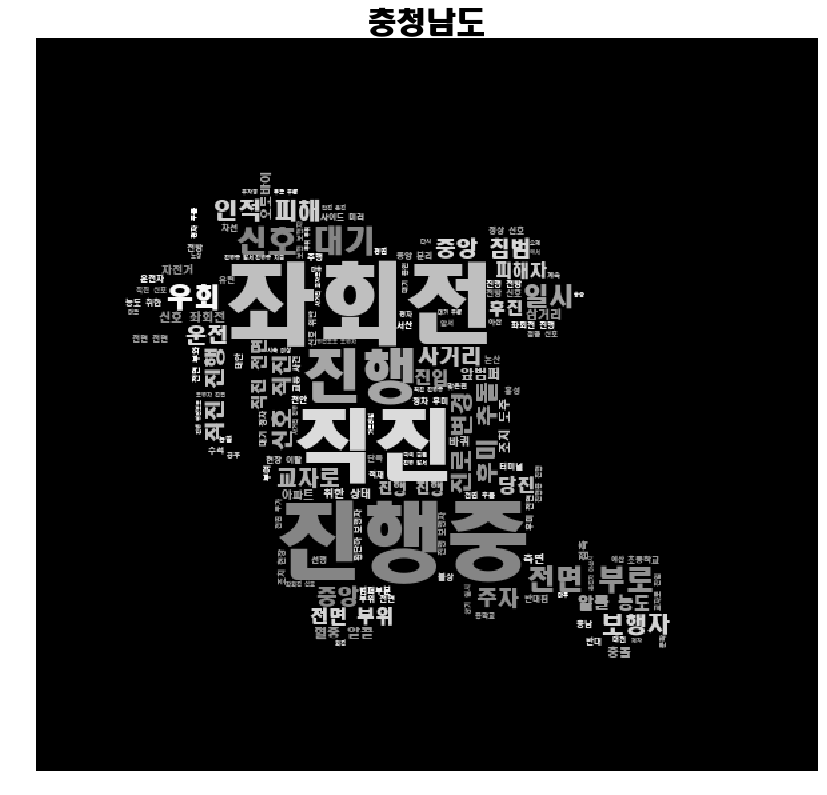

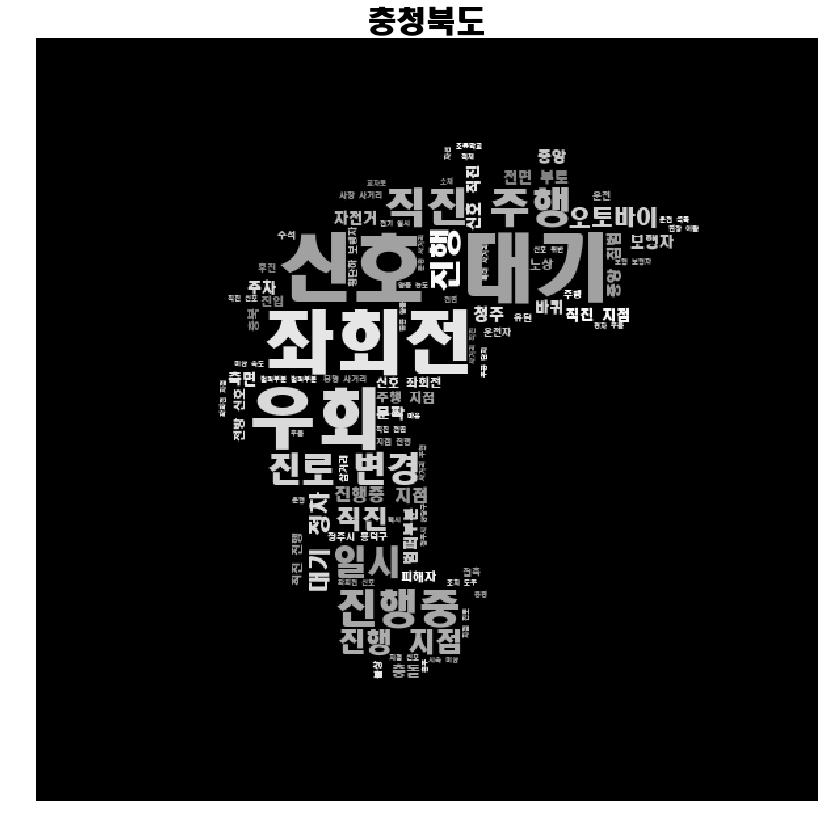

In [19]:
#for 문 설정 - 사고상황 데이터만 추출 후 워드클라우드 그리기
for i in m_list:
    
    a = result1[result1['법정동'] == '%s' % i]
    b = a['사고상황']
    c = ",".join(str(v) for v in b)
    d = nlp.nouns(c)
    e = ",".join(d)
    mask = np.array(Image.open("C:/python/프로젝트/마스크/%s.jpg" %i))
    wc = WordCloud(background_color="black", max_words=2000, mask=mask, stopwords = stopwords,font_path = font_location)
    wc2 = wc.generate(e)
    
    fig = plt.figure()
    title = ('%s' %i)
    fig.set_figwidth(14)
    fig.set_figheight(18)
    
    plt.imshow(wc.recolor(color_func=grey_color, random_state=3))
    plt.title(title, size=30)
    plt.axis('off')
    plt.show()
    plt.savefig("%s.png" %i)
    